# **Imports**

In [0]:
import numpy as np
import math  
import cv2
import scipy.signal

from matplotlib import pyplot as plt
from skimage.metrics import mean_squared_error

%matplotlib inline

# **Image Wrapper Class**

In [0]:
class Image(object):
  def __init__(self, path):
    self.path = path

    self.rgb_image = None
    self.bgr_image = None
    self.gray_image = None


  def read_image(self, return_image = False):
    self.rgb_image = plt.imread(self.path)
    if return_image:
      return self.rgb_image


  def bgr(self, return_image = False):
    self.bgr_image = np.flip(plt.imread(self.path), 2)
    if return_image:
      return self.bgr_image


  def gray(self, return_image = False):
    self.gray_image = cv2.cvtColor(plt.imread(self.path), cv2.COLOR_RGB2GRAY)
    if return_image:
      return self.gray_image


  @staticmethod
  def show(image, title = 'image'):
    if len(image.shape) == 3:
      plt.imshow(image)
    else:
      plt.imshow(image, cmap = 'gray')

    plt.axis('off')
    plt.savefig("./data/" + title + ".png")
    plt.title(title)


  @staticmethod
  def show_all(image_list, title_list):
    assert len(image_list) == len(title_list), "Incompatible lengths of lists!"
    N = len(image_list)
    plt.figure(figsize=[20, 20])

    for i in range(N):
      plt.subplot(1, N, i + 1)
      Image.show(image_list[i], title_list[i])
    
    plt.show()

Converts (N, N, 1) filter to (N, N, 3) filter

In [0]:
def add_filter_rgb_channels(f):
  rgb_f = np.zeros((f.shape[0], f.shape[1], 3))
  f = np.squeeze(f, axis=2)

  for c in range(rgb_f.shape[2]):
    rgb_f[:, :, c] = f

  return rgb_f

# **Filters' Definitions**

In [0]:
# 3x3x1 filters
h_sobel3 = (np.asarray([[1, 0, -1], [2, 0, -2], [1, 0, -1]]) / 9)[:, :, np.newaxis]
v_sobel3 = (np.asarray([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) / 9)[:, :, np.newaxis]
laplacian3 = np.asarray([[-1] * 3, [-1, 8, -1], [-1] * 3])[:, :, np.newaxis]
sharpen3 = np.asarray([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])[:, :, np.newaxis]
box_blur3 = (np.asarray([[1] * 3, [1] * 3, [1] * 3]) / 5)[:, :, np.newaxis]
gaus3 = (np.asarray([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 5)[:, :, np.newaxis]
no_effect3 = np.asarray([[0] * 3, [0, 1, 0], [0] * 3])[:, :, np.newaxis]
h_blur3 = np.asarray([[0] * 3, [1] * 3, [0] * 3])[:, :, np.newaxis]
v_blur3 = np.asarray([[0, 1, 0], [0, 1, 0], [0, 1, 0]])[:, :, np.newaxis]
main_diagonal_sobel = (np.asarray([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]]))[:, :, np.newaxis]
sec_diagonal_sobel = (np.asarray([[-2, -1, 0], [-1, 0, 1], [0, 1, 2]]))[:, :, np.newaxis]

kernels3 = [h_sobel3, v_sobel3, laplacian3, sharpen3, box_blur3, gaus3,
            no_effect3, main_diagonal_sobel, sec_diagonal_sobel, h_blur3, v_blur3]
            
titles3 = ["h_sobel3", "v_sobel3", "laplacian3", "sharpen3", "box_blur3", "gaus3",
           "no_effect3", "main_diagonal_sobel", "sec_diagonal_sobel", "h_blur3", "v_blur3"]


# 5x5x1 filters
h_sobel5 = (np.asarray([[2, 1, 0, -1, -2], [2, 1, 0, -1, -2], [4, 2, 0, -2, -4],
                                [2, 1, 0, -1, -2], [2, 1, 0, -1, -2]]) / 25)[:, :, np.newaxis]

v_sobel5 = (np.asarray([[2, 2, 4, 2, 2], [1, 1, 2, 1, 1], [0, 0, 0, 0, 0],
                              [-1, -1, -2, -1, -1], [-2, -2, -4, -2, -2]]) / 25)[:, :, np.newaxis]

laplacian5 = np.asarray([[-1] * 5, [-1] * 5, [-1, -1, 8, -1, -1], [-1] * 5, [-1] * 5])[:, :, np.newaxis]

sharpen5 = np.asarray([[0, 0, -1, 0, 0], [0, 0, -1, 0, 0], [-1, -1, 5, -1, -1],
                       [0, 0, -1, 0, 0], [0, 0, -1, 0, 0]])[:, :, np.newaxis]

box_blur5 = (np.asarray([[1] * 5, [1] * 5, [1] * 5, [1] * 5, [1] * 5]) / 9)[:, :, np.newaxis]

gaus5 = (np.asarray([[1, 4, 7, 4, 1], [4, 16, 26, 16, 4], [7, 26, 41, 26, 7], 
                     [4, 16, 26, 16, 4], [1, 4, 7, 4, 1]]) / 273)[:, :, np.newaxis]

no_effect5 = np.asarray([[0] * 5, [0] * 5, [0, 0, 1, 0, 0], [0] * 5, [0] * 5])[:, :, np.newaxis]

main_diagonal_blur = (np.asarray([[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0],
                              [0, 0, 0, 1, 0], [0, 0, 9, 0, 1]]) / 25)[:, :, np.newaxis]

h_blur5 = np.asarray([[0] * 5, [0] * 5, [1] * 5, [0] * 5, [0] * 5])[:, :, np.newaxis]

v_blur5 = np.asarray([[0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0],
                      [0, 0, 1, 0, 0], [0, 0, 1, 0, 0]])[:, :, np.newaxis]

sec_diagonal_blur = (np.asarray([[0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0],
                              [0, 1, 0, 0, 0], [1, 0, 0, 0, 0]]) / 25)[:, :, np.newaxis]

kernels5 = [h_sobel5, v_sobel5, laplacian5, sharpen5, box_blur5, gaus5,
            no_effect5, main_diagonal_blur, sec_diagonal_blur, h_blur5, v_blur5]

titles5 = ["h_sobel5", "v_sobel5", "laplacian5", "sharpen5", "box_blur5", "gaus5",
           "no_effect5", "main_diagonal_blur", "sec_diagonal_blur", "h_blur5", "v_blur5"]


# 3x3x3 filters
rgb_h_sobel3 = add_filter_rgb_channels(h_sobel3)
rgb_v_sobel3 = add_filter_rgb_channels(v_sobel3)
rgb_laplacian3 = add_filter_rgb_channels(laplacian3)
rgb_sharpen3 =  add_filter_rgb_channels(sharpen3)
rgb_box_blur3 = add_filter_rgb_channels(box_blur3)
rgb_gaus3 = add_filter_rgb_channels(gaus3)
rgb_no_effect3 = add_filter_rgb_channels(no_effect3)
rgb_h_blur3 = add_filter_rgb_channels(h_blur3)
rgb_v_blur3 = add_filter_rgb_channels(v_blur3)
rgb_main_diagonal_sobel = add_filter_rgb_channels(main_diagonal_sobel)
rgb_sec_diagonal_sobel = add_filter_rgb_channels(sec_diagonal_sobel)

rgb_kernels3 = [rgb_h_sobel3, rgb_v_sobel3, rgb_laplacian3, rgb_sharpen3, rgb_box_blur3,
                rgb_gaus3, rgb_no_effect3, rgb_main_diagonal_sobel, rgb_sec_diagonal_sobel, rgb_h_blur3, rgb_v_blur3]

rgb_titles3 = ["rgb_h_sobel3", "rgb_v_sobel3", "rgb_laplacian3", "rgb_sharpen3", "rgb_sec_diagonal3",
           "rgb_gaus3", "rgb_no_effect3", "rgb_main_diagonal_sobel", "rgb_sec_diagonal_sobel", "rgb_h_blur3", "rgb_v_blur3"]


# 5x5x3 filters
rgb_h_sobel5 = add_filter_rgb_channels(h_sobel5)
rgb_v_sobel5 = add_filter_rgb_channels(v_sobel5)
rgb_laplacian5 = add_filter_rgb_channels(sharpen5)
rgb_sharpen5 =  add_filter_rgb_channels(sharpen5)
rgb_box_blur5 = add_filter_rgb_channels(box_blur5)
rgb_gaus5 = add_filter_rgb_channels(gaus5)
rgb_no_effect5 = add_filter_rgb_channels(no_effect5)
rgb_h_blur5 = add_filter_rgb_channels(h_blur5)
rgb_v_blur5 = add_filter_rgb_channels(v_blur5)
rgb_main_diagonal_blur = add_filter_rgb_channels(main_diagonal_blur)
rgb_sec_diagonal_blur = add_filter_rgb_channels(sec_diagonal_blur)

rgb_kernels5 = [rgb_h_sobel5, rgb_v_sobel5, rgb_laplacian5, rgb_sharpen5, rgb_box_blur5,
                rgb_gaus5, rgb_no_effect5, rgb_main_diagonal_blur, rgb_sec_diagonal_blur, rgb_h_blur5, rgb_v_blur5]

rgb_titles5 = ["rgb_h_sobel5", "rgb_v_sobel5", "rgb_laplacian5", "rgb_sharpen5", "rgb_sec_diagonal5",
           "rgb_gaus5", "rgb_no_effect5", "rgb_main_diagonal_blur", "rgb_sec_diagonal_blur", "rgb_h_blur5", "rgb_v_blur5"]

# **Show Input**

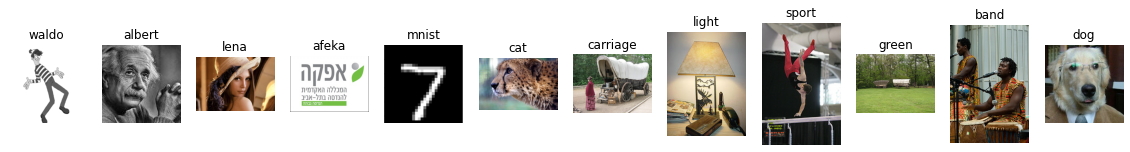

In [322]:
waldo = Image("./waldo.jpg").gray(True)
albert = Image("./albert.jpg").read_image(True)
lena = Image("./lena.jpg").read_image(True)
afeka = Image("./afeka.jpg").read_image(True)
band = Image("./band.jpg").read_image(True)
dog = Image("./dog.jpg").read_image(True)
mnist = Image("./mnist.jpg").read_image(True)[:, :, 0]

# ImageNet photos
cat = Image("./cat.jpg").read_image(True)
carriage = Image("./carriage.jpg").read_image(True)
light = Image("./light.jpg").read_image(True)
sport = Image("./sport.jpg").read_image(True)
green = Image("./green.jpg").read_image(True)

Image.show_all([waldo, albert, lena, afeka, mnist, cat, carriage, light, sport, green, band, dog], 
               ["waldo", "albert", "lena", "afeka", "mnist", "cat", "carriage", "light", "sport", "green", "band", "dog"])

# **Relu Function Definition**

In [0]:
def relu(img):
  # Operates 'relu' activation function on a given image
  # Returns the activated image

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      for c in range(img.shape[2]):
        if img[i][j][c] < 0:
          img[i][j][c] = 0

  return img 

# **Max Absolute Normalization Definition**

In [0]:
def norm(img):
  max_pixel = np.max(np.abs(img))

  if max_pixel != 0:
    return img / max_pixel
  return img

# **Threshold Function**

In [0]:
def thresh(img, t):
  temp_img = np.copy(img)
  for i in range(temp_img.shape[0]):
    for j in range(temp_img.shape[1]):
      for c in range(temp_img.shape[2]):
        if temp_img[i][j][c] < t:
          temp_img[i][j][c] = 0

  return temp_img

# **Correlation**

One-step Correlation

In [0]:
def current_corr2d(current_mat, kernels):
  assert kernels.shape[0] == kernels.shape[1], "Incompatible size of kernel!"
  assert current_mat.shape[0] == kernels.shape[0] and current_mat.shape[1] == kernels.shape[1], "Incompatible sizes of matrices!"
 
  channels_sums = 0
  for i in range(current_mat.shape[0]):
    for j in range(current_mat.shape[1]):
      for c in range(current_mat.shape[2]): 
        channels_sums += current_mat[i][j][c] * kernels[i][j][c]

  return channels_sums

Normalized Cross-Correlation Definition

In [0]:
def cross_correlation_norm(patch, f):
  mean_patch = np.mean(patch)
  mean_filter = np.mean(f)
  sub1 = patch - mean_patch
  sub2 = f - mean_filter

  sum1, sum2 = 0, 0
  for i in range(f.shape[0]):
    for j in range(f.shape[1]):
      for c in range(f.shape[2]):
        sum1 += np.power(patch[i][j][c] - mean_patch, 2)
        sum2 += np.power(f[i][j][c] - mean_filter, 2)

  sqrt_ = math.sqrt(sum1 * sum2)
  if sqrt_ != 0:
    return sub1 / sqrt_, sub2
  else:
    return patch, f

Checks And Preprocessing

In [0]:
def pre_corr(Im, Ker, S, P, N, Norm, CORR, ACTV):
  # Validates the input arguments and commits preprocess of the correlation / convolution operations
  # Returns the padded image and the kernels for the given operation

  # Input checks
  assert len(Im.shape) == 3, str("Expected Im to has 3 dimensions, got " + str(len(Im.shape)))
  assert len(Ker.shape) == 3, str("Expected Ker to has 3 dimensions, got " + str(len(Ker.shape)))
  assert S > 0, "Invalid value for stride S!"
  assert P >= 0, "Invalid value for padding P!"
  assert N > 0, "Invalid value for kenels' number N!"
  assert ACTV == None or ACTV == relu, "Invalid value for activation function ACTV!"
  
  new_Ker = list()
  if not CORR: # Convolution
    for k in Ker: # Rotates kernels by 180 degrees
      new_Ker.append(k[::-1])
  else:
    new_Ker = Ker
      
  # Padd with zeroes the image if P > 0
  Im = np.pad(Im, pad_width=((P, P), (P, P), (0, 0)), mode='constant', constant_values=0)

  return np.asarray(new_Ker), Im

myCorr

In [0]:
def myCorr(Im, Ker, S=1, P=0, N=1, Norm=False, CORR=True, ACTV=None):
  Ker, padded_img = pre_corr(Im, Ker, S, P, N, Norm, CORR, ACTV)
  W, H, C = Im.shape
  K = Ker[:][:][0].shape[0]
  new_shape = (((W - K + 2*P) // S + 1), ((H - K + 2*P) // S + 1), 1)
  new_img = np.zeros(new_shape)
  results = np.zeros((new_shape[0], new_shape[1], N))

  # Loop limits
  width = W + 2*P - K + 1
  height = H + 2*P - K + 1

  for k_num in range(N):
    for i in range(0, width, S):
      for j in range(0, height, S):
        current_mat = padded_img[i : i + K, j : j + K, :]
        if Norm: # Then do normalized cross correlation
          current_mat, Ker = cross_correlation_norm(current_mat, Ker)
        current_sum = current_corr2d(current_mat, Ker) 
        new_img[i // S][j // S] = current_sum

    if ACTV is not None:
      new_img = ACTV(new_img)

    results[:, :, k_num] = np.squeeze(new_img, axis=2)

  return results

Test function for myCorr on a given image

In [0]:
def test_myCorr(img, kernel_lst, title_lst, S=1, P=0, N=1, Norm=False, CORR=True, ACTV=None):
  output = list()
  if img.shape[2] == 1:
    output.append(np.squeeze(img, axis=2))
  elif img.shape[2] == 3:
    output.append(img)
  title_lst = np.insert(title_lst, 0, "source")

  for k in kernel_lst:
    output.append(np.squeeze(myCorr(norm(img), k, S, P, N, Norm, CORR, ACTV), axis=2))
  
  Image.show_all(output, title_lst)

# **Finding items inside images**

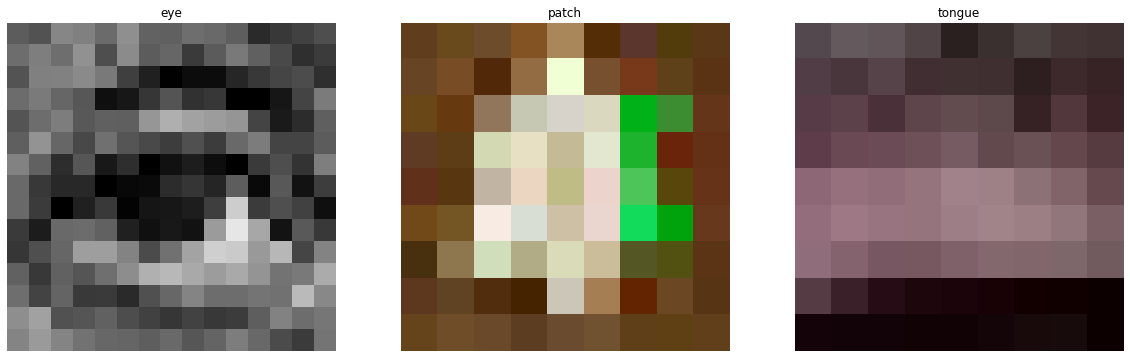

In [331]:
eye = albert[38:53, 37:52]
patch = band[216:225, 32:41, :]
tongue = dog[180:189, 137:146, :]

Image.show_all([eye, patch, tongue], ["eye", "patch", "tongue"])

In [0]:
new_albert = myCorr(Im=norm(albert), Ker=norm(eye), N=1, S=1, P=1, ACTV=relu, Norm=True, CORR=False)

In [0]:
new_band = myCorr(Im=norm(band), Ker=norm(patch), N=1, S=1, P=1, ACTV=relu, Norm=True, CORR=False)

In [0]:
new_dog = myCorr(Im=norm(dog), Ker=norm(tongue), N=1, S=1, P=1, ACTV=relu, Norm=True, CORR=False)

Good choices of threshold

In [0]:
find_eye = thresh(new_albert, 0.464)
find_eye = np.squeeze(find_eye, axis=2)

find_patch = thresh(new_band, 0.68)
find_patch = np.squeeze(find_patch, axis=2)

find_tongue = thresh(new_dog, 0.8)
find_tongue = np.squeeze(find_tongue, axis=2)

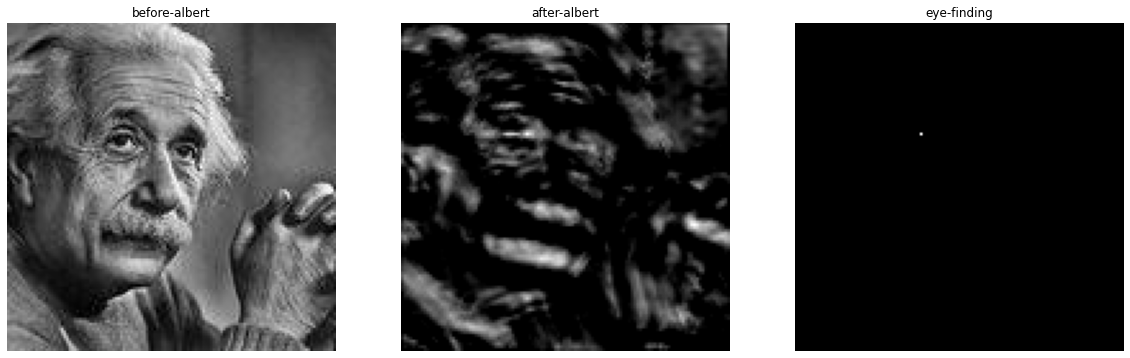

In [336]:
Image.show_all([albert, np.squeeze(new_albert, axis=2), find_eye], ["before-albert", "after-albert", "eye-finding"])

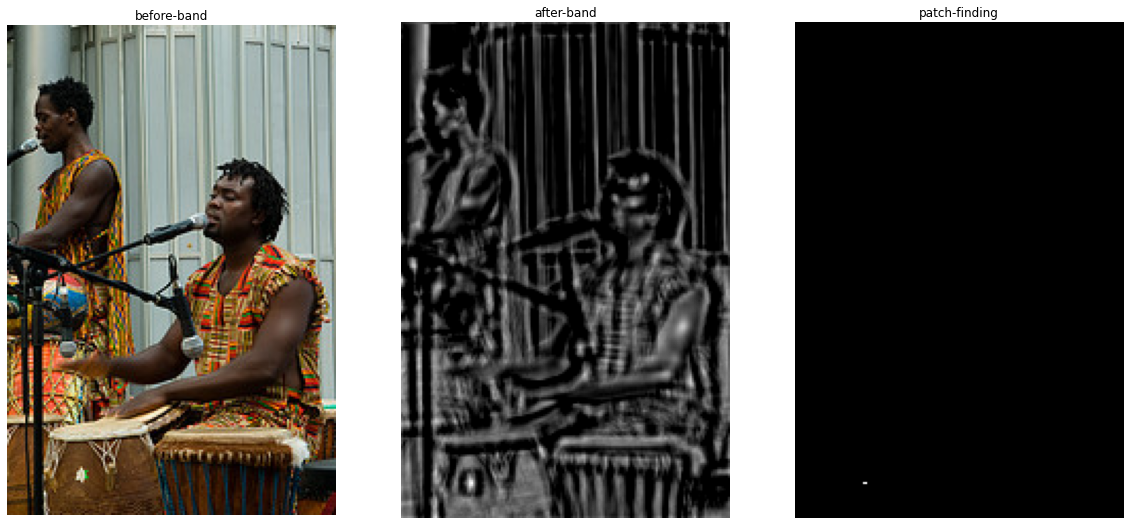

In [337]:
Image.show_all([band, np.squeeze(new_band, axis=2), find_patch], ["before-band", "after-band", "patch-finding"])

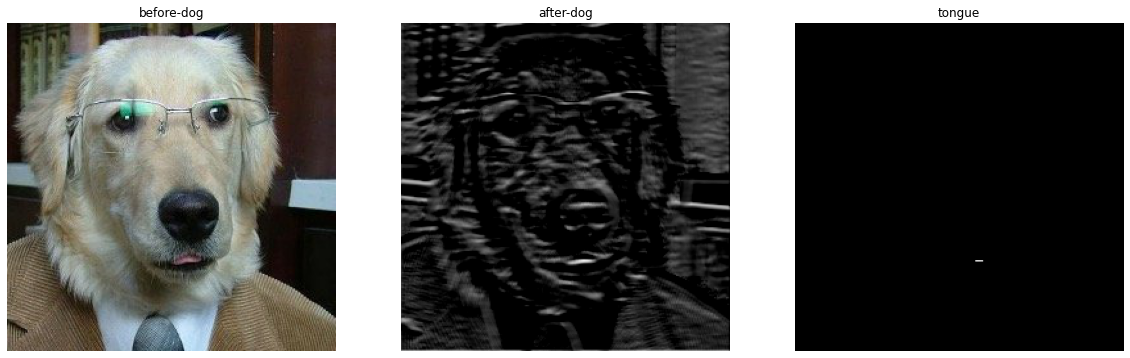

In [338]:
Image.show_all([dog, np.squeeze(new_dog, axis=2), find_tongue], ["before-dog", "after-dog", "tongue"])

Bad choices of threshold

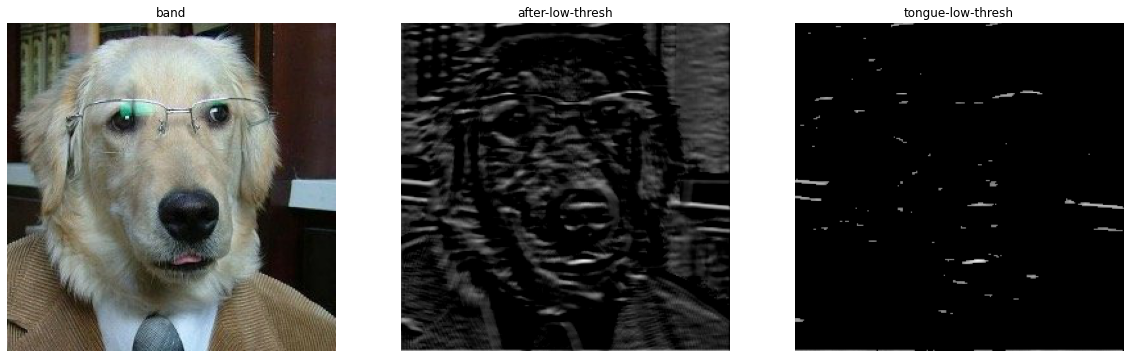

In [339]:
# Too low threshold
find_tongue = thresh(new_dog, 0.4)
find_tongue = np.squeeze(find_tongue, axis=2)

Image.show_all([dog, np.squeeze(new_dog, axis=2), find_tongue], ["band", "after-low-thresh", "tongue-low-thresh"])

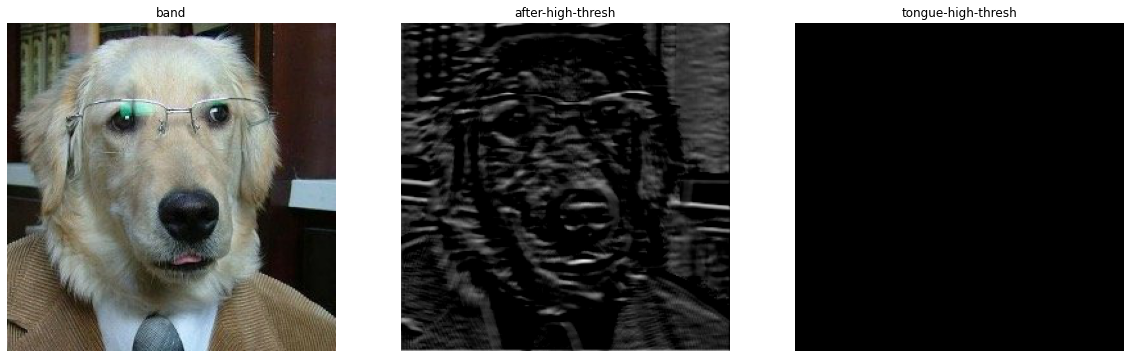

In [340]:
# Too high threshold
find_tongue = thresh(new_dog, 0.99)
find_tongue = np.squeeze(find_tongue, axis=2)

Image.show_all([dog, np.squeeze(new_dog, axis=2), find_tongue], ["band", "after-high-thresh", "tongue-high-thresh"])

# **Calculates Distances Of myCorr Function**

In [0]:
def L1(img1, img2):
  # Calculates L1 norm between two images

  assert len(img1.shape) == 3, str("Expected img1 to has 3 dimensions, got " + str(len(img1.shape)))
  assert len(img2.shape) == 3, str("Expected img2 to has 3 dimensions, got " + str(len(img2.shape)))
  assert img1.shape[0] == img2.shape[0] and img1.shape[1] == img2.shape[1], "Incompatible sizes of images!"

  return abs(np.sum(img1) - np.sum(img2))


def L2(img1, img2):
  # Calculates L2 norm between two images
  
  assert len(img1.shape) == 3, str("Expected img1 to has 3 dimensions, got " + str(len(img1.shape)))
  assert len(img2.shape) == 3, str("Expected img2 to has 3 dimensions, got " + str(len(img2.shape)))
  assert img1.shape[0] == img2.shape[0] and img1.shape[1] == img2.shape[1], "Incompatible sizes of images!"

  sum = 0
  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      for c in range(img1.shape[2]):
        sum += math.pow((img1[i][j][c] - img2[i][j][c]), 2)

  return math.sqrt(sum)

In [0]:
def calculate_differences(img1, img2):
  mse = mean_squared_error(img1, img2)
  norm2 = L2(img1, img2)
  norm1 = L1(img1, img2)
  flag =  np.array_equal(img1, img2)

  print('MSE: ' + str(mse) + '\nNorm L2: ' + str(norm2) + '\nNorm L1: ' + str(norm1) + '\nHistogram Comparison: ' + str(flag))

In [0]:
normalized_gray_waldo = norm(waldo)[:, :, np.newaxis]

Correlating with a no-effect filter to compare with source image


In [0]:
new_gray_waldo = myCorr(Im=normalized_gray_waldo, Ker=no_effect3, P=1)

MSE: 0.0
Norm L2: 0.0
Norm L1: 0.0
Histogram Comparison: True


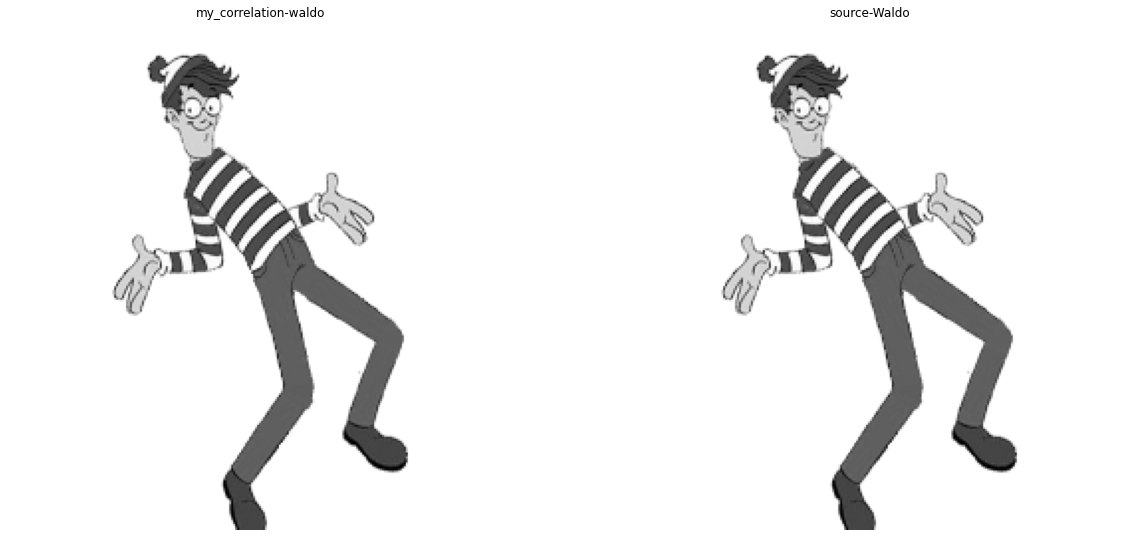

In [0]:
# Comparing a gray image before correlation and the same image after a correlation with no-effect filter
calculate_differences(normalized_gray_waldo, new_gray_waldo)
Image.show_all([np.squeeze(new_gray_waldo, axis=2), waldo], ["my_correlation-waldo", "source-Waldo"])

Comparing Scipy Convolution to myCorr Convolution

In [0]:
my_sharpened_waldo = myCorr(Im=normalized_gray_waldo, Ker=sharpen3, P=1, CORR=False)
scipy_result = scipy.signal.convolve2d(norm(waldo), np.squeeze(sharpen3, axis=2), 'same')

MSE: 3.0627064500293143e-33
Norm L2: 1.4167481424343606e-14
Norm L1: 7.275957614183426e-12
Histogram Comparison: False


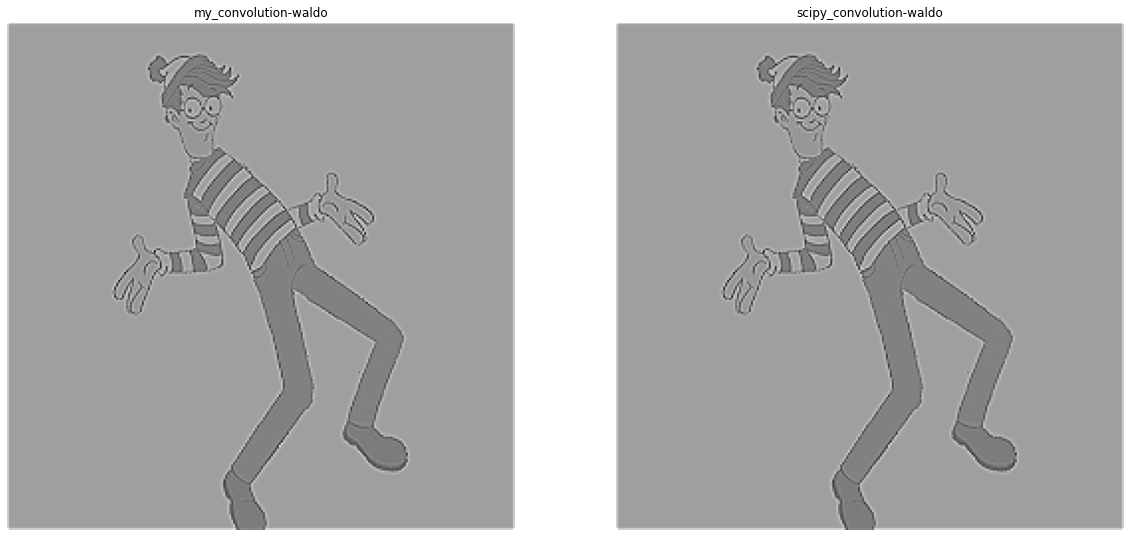

In [0]:
# Comparing a myCorr convolution with scipy convolution by sharpening filter
calculate_differences(my_sharpened_waldo, scipy_result[:, :, np.newaxis])
Image.show_all([np.squeeze(my_sharpened_waldo, axis=2), scipy_result], ["my_convolution-waldo", "scipy_convolution-waldo"])

# **Cascade Two Layers**

In [0]:
class Convolutional_Layer():
  def __init__(self, data, f, act=None):
    self.data = data
    self.f = f
    self.act = act

  def forward(self):
    return myCorr(self.data, self.f, P=1, N=1, ACTV=self.act)

In [0]:
class Sobel_Model():
  def __init__(self, data, f1, f2):
    self.data = data
    self.f1 = f1
    self.f2 = f2
    
    self.conv1 = None
    self.conv2 = None

    self.output = list()
    self.output.append(data)


  def forward(self):
    self.conv2 = Convolutional_Layer(self.data, self.f2)
    o1 = self.conv2.forward()

    self.conv1 = Convolutional_Layer(o1, self.f1)
    o2 = self.conv1.forward()

    self.output.append(o1)
    self.output.append(o2)

    return o2

In [0]:
f1 = h_sobel5
f2 = sharpen3
data = norm(Image('./afeka.jpg').gray(True))[:, :, np.newaxis]

In [0]:
model = Sobel_Model(data, f1, f2)
output = model.forward()
output = [np.squeeze(o, axis=2) for o in model.output]

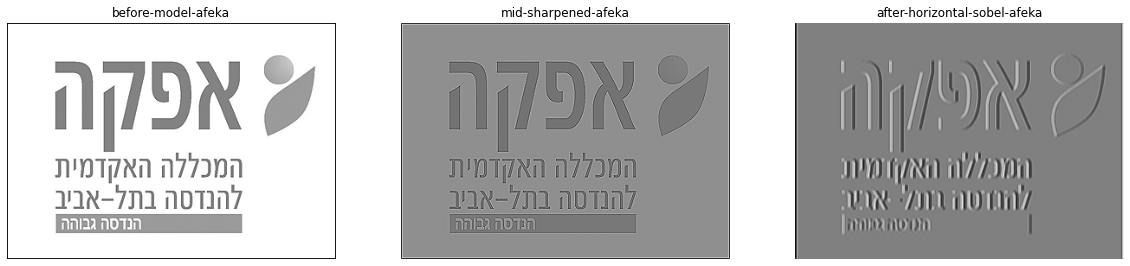

In [0]:
Image.show_all(output, ["before-model-afeka", "mid-sharpened-afeka", "after-horizontal-sobel-afeka"])

In [0]:
# Tests parameter N

waldos = myCorr(normalized_gray_waldo, main_diagonal_sobel, N=3, ACTV=relu)
waldos = [waldos[:, :, 0], waldos[:, :, 1], waldos[:, :, 2]]

Image.show_all(waldos, ["waldo-1", "waldo-2", "waldo-3"])

In [0]:
afeka_titles = [t + "-afeka" for t in rgb_titles3]

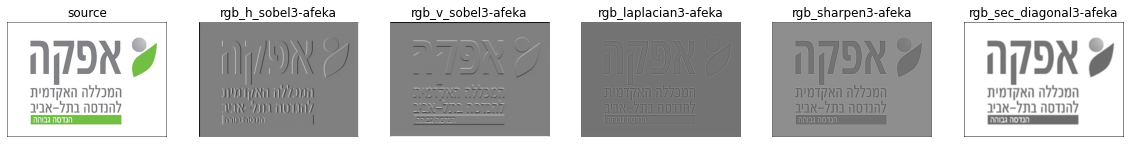

In [0]:
test_myCorr(img=afeka, kernel_lst=rgb_kernels3[: len(rgb_kernels3) // 2], title_lst=afeka_titles[: len(afeka_titles) // 2], P=1)

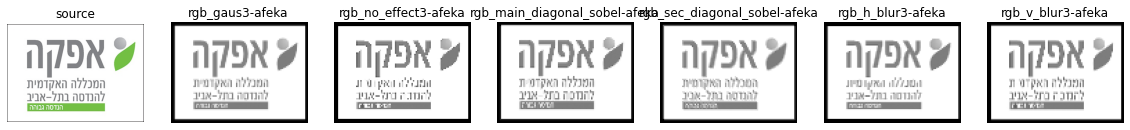

In [0]:
test_myCorr(img=afeka, kernel_lst=rgb_kernels5[len(rgb_kernels5) // 2 :], title_lst=afeka_titles[len(afeka_titles) // 2 :], P=10, S=4, CORR=False, ACTV=relu)

In [0]:
cat_titles = [t + "-cat" for t in rgb_titles3]

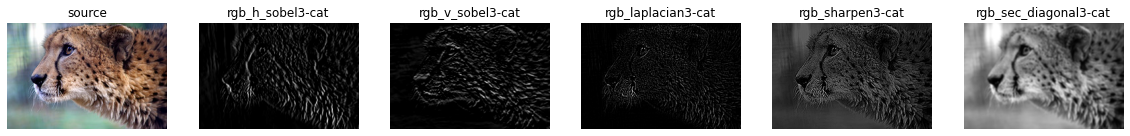

In [0]:
test_myCorr(img=cat, kernel_lst=rgb_kernels3[: len(rgb_kernels3) // 2], title_lst=cat_titles[: len(cat_titles) // 2], P=0, S=1, ACTV=relu)

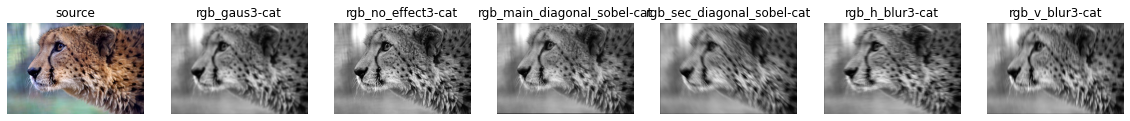

In [0]:
test_myCorr(img=cat, kernel_lst=rgb_kernels5[len(rgb_kernels5) // 2 :], title_lst=cat_titles[len(cat_titles) // 2 :], P=1, S=1, CORR=False)

In [0]:
carriage_titles = [t + "-carriage" for t in rgb_titles5]

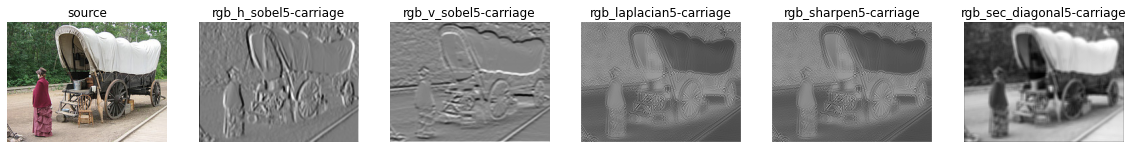

In [0]:
test_myCorr(img=carriage, kernel_lst=rgb_kernels5[: len(rgb_kernels5) // 2], title_lst=carriage_titles[: len(carriage_titles) // 2], P=1, S=1, CORR=True)

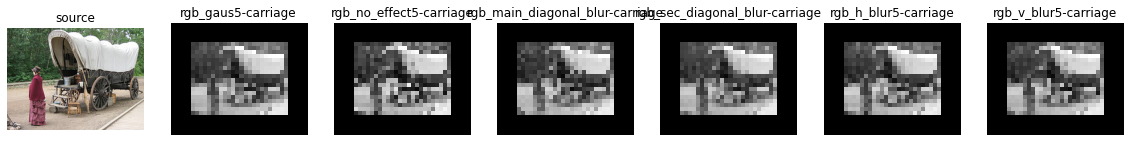

In [0]:
test_myCorr(img=carriage, kernel_lst=rgb_kernels5[len(rgb_kernels5) // 2 :], title_lst=carriage_titles[len(carriage_titles) // 2 :], P=50, S=10, CORR=False)

In [0]:
green_titles = [t + "-green" for t in rgb_titles5]

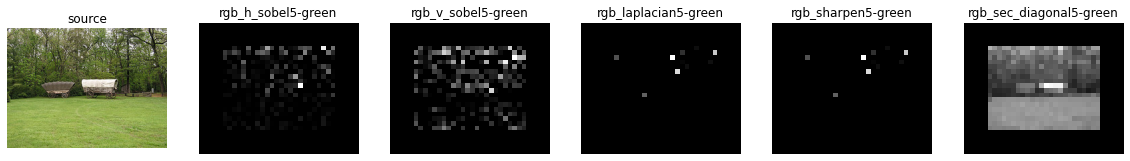

In [0]:
test_myCorr(img=green, kernel_lst=rgb_kernels5[: len(rgb_kernels5) // 2], title_lst=green_titles[: len(green_titles) // 2], P=50, S=10, ACTV=relu)

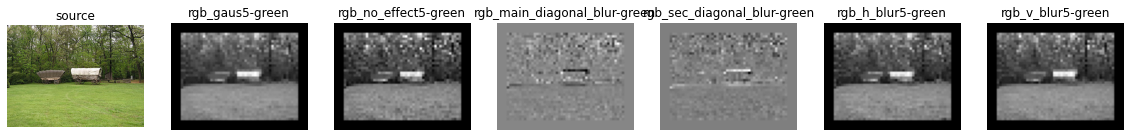

In [0]:
test_myCorr(img=green, kernel_lst=rgb_kernels3[len(rgb_kernels3) // 2 :], title_lst=green_titles[len(green_titles) // 2 :], P=20, S=5, CORR=True)

In [0]:
lena_titles3 = [t + "-lena" for t in rgb_titles3]
lena_titles5 = [t + "-lena" for t in rgb_titles5]

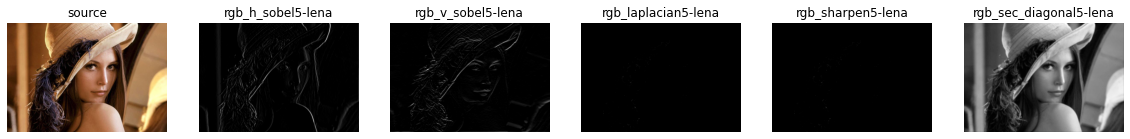

In [0]:
test_myCorr(img=lena, kernel_lst=rgb_kernels5[: len(rgb_kernels5) // 2], title_lst=lena_titles5[: len(lena_titles5) // 2], P=1, S=1, ACTV=relu)

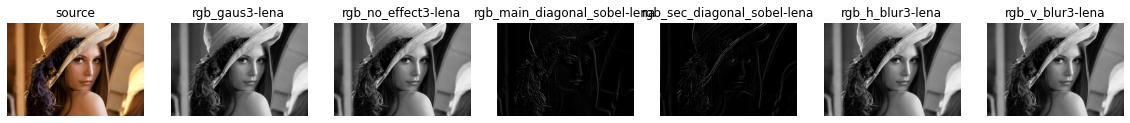

In [0]:
test_myCorr(img=lena, kernel_lst=rgb_kernels3[len(rgb_kernels3) // 2 :], title_lst=lena_titles3[len(lena_titles3) // 2 :], P=1, S=2, ACTV=relu)

In [0]:
light_titles3 = [t + "-light" for t in rgb_titles3]
light_titles5 = [t + "-light" for t in rgb_titles5]

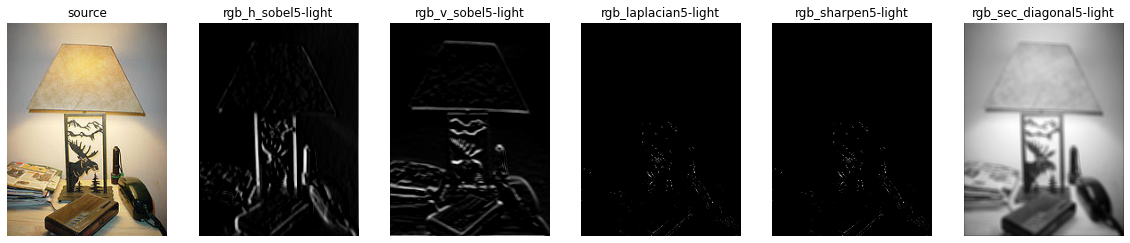

In [0]:
test_myCorr(img=light, kernel_lst=rgb_kernels5[: len(rgb_kernels5) // 2], title_lst=light_titles5[: len(light_titles5) // 2], P=1, S=1, ACTV=relu)

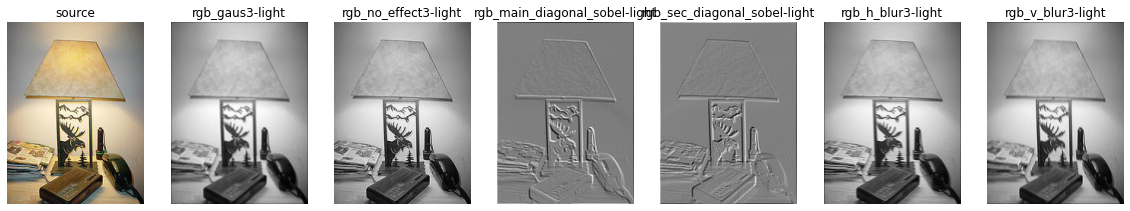

In [0]:
test_myCorr(img=light, kernel_lst=rgb_kernels3[len(rgb_kernels3) // 2 :], title_lst=light_titles3[len(light_titles3) // 2 :], P=1, S=1)

In [0]:
mnist_titles3 = [t + "-mnist" for t in titles3]
mnist_titles5 = [t + "-mnist" for t in titles5]

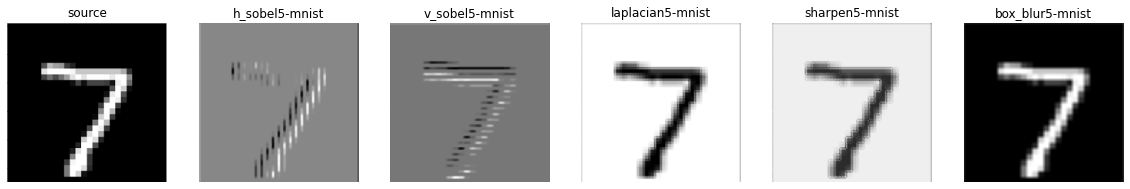

In [0]:
test_myCorr(img=mnist[:, :, np.newaxis], kernel_lst=kernels5[: len(kernels5) // 2], title_lst=mnist_titles5[: len(mnist_titles5) // 2], P=1, S=1)

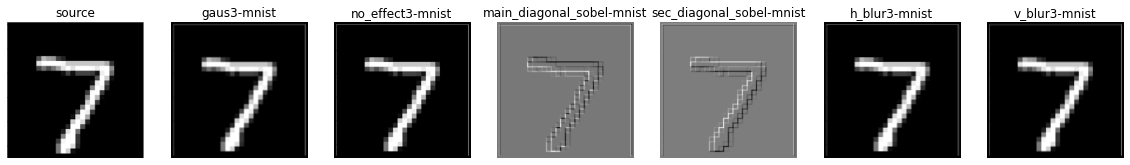

In [0]:
test_myCorr(img=mnist[:, :, np.newaxis], kernel_lst=kernels3[len(kernels3) // 2 :], title_lst=mnist_titles3[len(mnist_titles3) // 2 :], P=5)

In [0]:
sport_titles3 = [t + "-sport" for t in rgb_titles3]
sport_titles5 = [t + "-sport" for t in rgb_titles5]

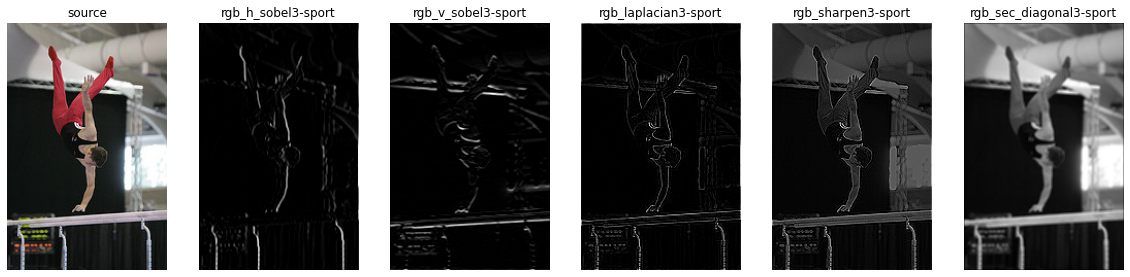

In [0]:
test_myCorr(img=sport, kernel_lst=rgb_kernels3[: len(rgb_kernels3) // 2], title_lst=sport_titles3[: len(sport_titles3) // 2], P=1, S=1, ACTV=relu)

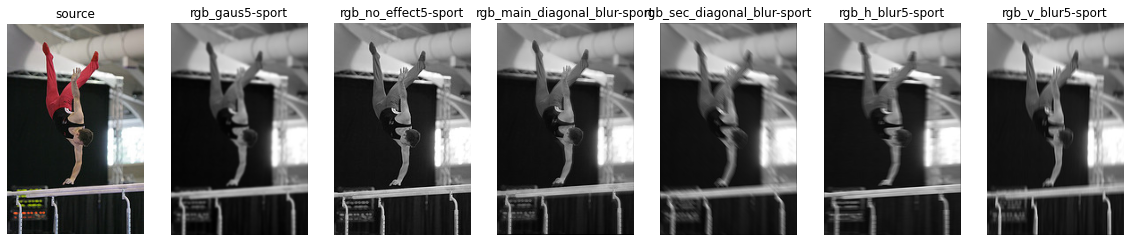

In [0]:
test_myCorr(img=sport, kernel_lst=rgb_kernels5[len(rgb_kernels5) // 2 :], title_lst=sport_titles5[len(sport_titles5) // 2 :], P=1, S=1, CORR=False)

In [0]:
waldo_titles3 = [t + "-waldo" for t in titles3]

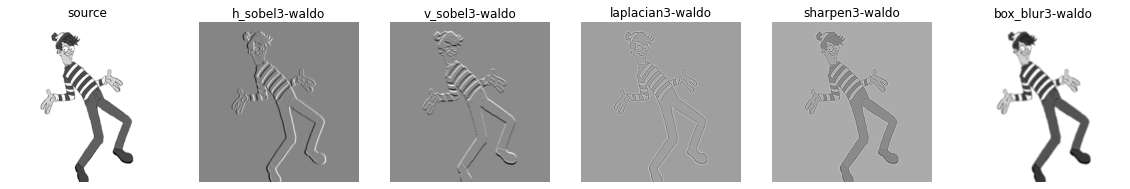

In [0]:
test_myCorr(img=waldo[:, :, np.newaxis], kernel_lst=kernels3[: len(kernels3) // 2], title_lst=waldo_titles3[: len(waldo_titles3) // 2], P=0, S=1, CORR=False)

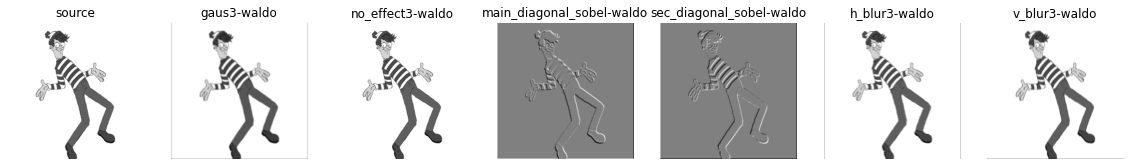

In [0]:
test_myCorr(img=waldo[:, :, np.newaxis], kernel_lst=kernels3[len(kernels3) // 2 :], title_lst=waldo_titles3[len(waldo_titles3) // 2 :], P=1, CORR=True)

In [341]:
!zip -r /content/data.zip /content/data

updating: content/data/ (stored 0%)
updating: content/data/my_convolution-waldo.png (deflated 19%)
updating: content/data/after-horizontal-sobel-afeka.png (deflated 12%)
updating: content/data/source-Waldo.png (deflated 18%)
updating: content/data/after-albert.png (deflated 7%)
updating: content/data/rgb_gaus3-afeka.png (deflated 34%)
updating: content/data/source.png (deflated 52%)
updating: content/data/rgb_sec_diagonal3-afeka.png (deflated 16%)
updating: content/data/after.png (deflated 4%)
updating: content/data/rgb_sharpen3-afeka.png (deflated 19%)
updating: content/data/patch.png (deflated 78%)
updating: content/data/rgb_laplacian3-afeka.png (deflated 20%)
updating: content/data/tongue.png (deflated 4%)
updating: content/data/waldo.png (deflated 67%)
updating: content/data/afeka.png (deflated 25%)
updating: content/data/mnist.png (deflated 24%)
updating: content/data/before-band.png (deflated 4%)
updating: content/data/eye-finding.png (deflated 7%)
updating: content/data/scipy_co